# PROGETTO BUSINESS INTELLIGENCE

In [1]:
import pandas as pd
import sklearn as skl
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [2]:
data = pd.read_csv('bi_cleanTexts.csv')

In [3]:
data.head()

,Unnamed: 0,reviewerID,asin,reviewText,overall,label,vote,helpfulVote,year,month,day,hour,Date
0,0,AH9396O3FGHZF,B000P2A242,matter many time paul mccartney shift always c...,4,1,6,3,2007,6,18,2,2007-06-18
1,1,A39GW5CBWTIWAZ,B000852G2C,due respect all good stuf editorial comment in...,5,1,0,0,2008,11,3,1,2008-11-03
2,2,AW0K56SPCD5XK,B0001F7UHA,cd incredible this is indeed date usher best f...,4,1,0,0,2004,6,21,2,2004-06-21
3,3,A2YKADCJME4FSW,B00E5XLZM0,last time heard drum solo a new album think dr...,4,1,5,5,2013,12,29,1,2013-12-29
4,4,AH09XLCE12IO7,B00026WV9U,good release best the ai gang definitely a pop...,4,1,2,1,2004,10,15,2,2004-10-15


In [4]:
data.drop(columns = 'Unnamed: 0', inplace = True)

# ASSOCIATION RULES

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
  
stop_words = set(stopwords.words('english'))
ass1 = []
for i in range(len(data)):
    word_tokens = word_tokenize(data['reviewText'][i])
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    ass1.append(filtered_sentence)

In [6]:
ass1_1 = []
for i in range(4):
    indici = data.loc[data.loc[:,'label']==i+1,:].index.tolist()
    ass1_1.append([ass1[i] for i in indici])

In [7]:
te = TransactionEncoder()
te_ary = te.fit(ass1_1[3]).transform(ass1_1[3])
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.05, use_colnames=True)
### alternatively:
#frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
#frequent_itemsets = fpmax(df, min_support=0.6, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.459,(read)
1,0.308,(one)
2,0.275,(love)
3,0.239,(great)
4,0.220,(good)
...,...,...
850,0.074,"(say, book)"
851,0.058,"(read, say)"
852,0.050,"(say, wa)"
853,0.051,"(book, heart)"


# WORDCLOUD

### Wordcloud su label

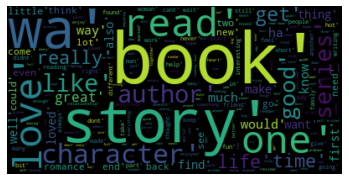

In [8]:
# Start with one review:
text = str(ass1_1[3])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud su overall

In [9]:
overAll = []
for i in range(4):
    indici = data.loc[data.loc[:,'overall']==i+1,:].index.tolist()
    overAll.append([ass1[i] for i in indici])

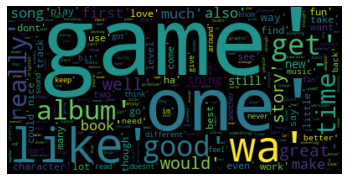

In [19]:
# Start with one review:
text1 = str(overAll[3])

# Create and generate a word cloud image:
wordcloud1 = WordCloud().generate(text1)

# Display the generated image:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()